In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel("En_In.xls")
df = data.copy()
df = df.drop(columns=["Unnamed: 0","Unnamed: 1" ])
df = df.rename(columns={"Unnamed: 2":"Country","Unnamed: 3":"Energy Supply","Unnamed: 4":"Energy Supply per Capita","Unnamed: 5":"% Renewable"})
df = df.drop(df.index[0:17])
df = df.drop(df.index[227:282])
df = df.replace('...', np.NaN)
df = df.reset_index(drop=True)
df["Energy Supply"] = df["Energy Supply"]*1000000
for index in df.index:
    if df.loc[index,'Country']=="Republic of Korea":
        df.loc[index,'Country'] = "South Korea"
    elif df.loc[index,'Country']=="United States of America20":
        df.loc[index,'Country'] = "United States"
    elif df.loc[index,'Country']=="United Kingdom of Great Britain and Northern Ireland19":
        df.loc[index,'Country'] = "United Kingdom"
    elif df.loc[index,'Country']=="China, Hong Kong Special Administrative Region3":
        df.loc[index,'Country'] = "Hong Kong"

In [3]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

for index in df.index:
    for i in df.loc[index,'Country']:
        if i.isdigit():
            df.loc[index,'Country'] = df.loc[index,'Country'].replace(i,"")

    
for index in df.index:
    start = " ("
    end = ")"
    substring = find_between(df.loc[index,'Country'],start, end)
    df.loc[index,'Country'] = df.loc[index,'Country'].replace(start+substring+end,'')

In [4]:
df.loc[df["Country"].isin(['American Samoa','South Korea','Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353


In [5]:
gpd = pd.read_csv('gpd.csv',skiprows=4)
gpd.loc[gpd.loc[gpd['Country Name']=="Korea, Rep."].index[0],'Country Name'] = "South Korea"
gpd.loc[gpd.loc[gpd['Country Name']=="Iran, Islamic Rep."].index[0],'Country Name'] = "Iran"
gpd.loc[gpd.loc[gpd['Country Name']=="Hong Kong SAR, China"].index[0],'Country Name'] = "Hong Kong"
gpd = gpd.rename(columns={'Country Name':'Country'})
gpd.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [6]:
scim = pd.read_excel("scimagojr.xlsx")
scim

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [7]:
cut_gpd = gpd[['Country','Country Code','Indicator Name', 'Indicator Code','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].copy()
cut_scim = scim.head(15)
intersect_df = pd.merge(pd.merge(df, cut_gpd, on="Country"),cut_scim,on='Country')
intersect_df = intersect_df.drop(columns=['Country Code','Indicator Name','Indicator Code'])
intersect_df = intersect_df[['Country','Rank','Documents','Citable documents','Citations','Self-citations','Citations per document','H index','Energy Supply','Energy Supply per Capita','% Renewable','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]    
intersect_df = intersect_df.reset_index(drop=True)
intersect_df = intersect_df.set_index('Country')
intersect_df.sort_values('Rank', ascending=True).head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [8]:
intersect_df.shape

(15, 20)

In [9]:
years = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
def task_8():
    df = intersect_df[years].mean(axis=1,skipna=True)
    return df.sort_values(ascending=False)
print(task_8())

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


In [10]:
years = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
def task_9():
    country = task_8()
    name = country.index[4]
    return (name, intersect_df.loc[name]['2015']-intersect_df.loc[name]['2006'])

print(task_9())

('France', 153345695364.24023)


In [11]:
def task_10():
    max_country = intersect_df.groupby(["% Renewable"])[['Rank']].max().index[-1]
    name = intersect_df.loc[intersect_df['% Renewable']==max_country].index[0]
    return (name,max_country)
print(task_10())


('Brazil', 69.64803)


In [12]:
intersect_df["Population"] = intersect_df["Energy Supply"] / intersect_df["Energy Supply per Capita"]
def task_11():
    pop = intersect_df.groupby(["Population"])[['Rank']].max()
    name = intersect_df.loc[intersect_df['Population']==pop.index[-6]].index[0]
    return (name, pop.index[-6])
print(task_11())   

('Japan', 127409395.97315437)


In [13]:
intersect_df["Docs per person"] = intersect_df['Citable documents'] / intersect_df['Population']
def task_12():
    col_1 = intersect_df["Docs per person"]
    col_2 = intersect_df["Energy Supply per Capita"]
    return col_1.corr(col_2)
print(task_12())

0.7940010435442942


In [14]:
median = intersect_df["% Renewable"].describe().values[5]
#intersect_df["% Renewable"].median()
intersect_df = intersect_df.sort_values('Rank',ascending=True)
def task_13():
    intersect_df["Above median"] = intersect_df["% Renewable"].apply(lambda x: 1 if x>=median else 0 )
    return intersect_df["Above median"]
print(task_13())

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above median, dtype: int64


In [15]:
ContinentDict = {'China':'Asia',
'United States':'North America',
'Japan':'Asia',
'United Kingdom':'Europe',
'Russian Federation':'Europe',
'Canada':'North America',
'Germany':'Europe',
'India':'Asia',
'France':'Europe',
'South Korea':'Asia',
'Italy':'Europe',
'Spain':'Europe',
'Iran':'Asia',
'Australia':'Australia',
'Brazil':'South America'}

In [16]:
intersect_df.groupby(ContinentDict)['Population'].agg(['count','sum', 'mean','std'])

,count,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [17]:
from matplotlib import pyplot as plt


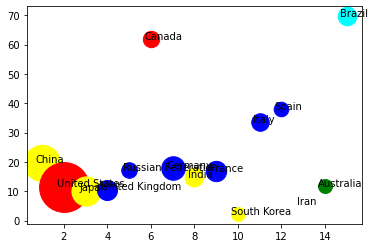

In [18]:
ContinentDict1  = {
                  'China':['Asia', "yellow"],
                  'United States':['North America', "red"],
                  'Japan':['Asia', "yellow"], 
                  'United Kingdom':['Europe', "blue"],
                  'Russian Federation':['Europe', "blue"],
                  'Canada':['North America', "red"],
                  'Germany':['Europe', "blue"],
                  'India':['Asia', "yellow"],
                  'South Korea':['Asia', "yellow"], 
                  'France':['Europe', "blue"],
                  'Italy':['Europe', "blue"],
                  'Spain':['Europe', "blue"],
                  'Iran':['Asia', "yellow"],
                  'Australia':['Australia', "green"],
                  'Brazil':['South America', "cyan"]}

x_s = intersect_df['Rank']
y_s = intersect_df['% Renewable']
countries_list = list(intersect_df.index)
z_s=intersect_df['2015']
for i, text in enumerate(list(intersect_df.index)):
         plt.annotate(text, (x_s[i] - 0.3, y_s[i]))
for country in countries_list:
    x=x_s.loc[country]
    y=y_s.loc[country]
    s=z_s.loc[country]/100000000000*15
    try:
        round(s)
    except Exception:
        s=0
    plt.scatter(x,y, s, c = ContinentDict1[country][1])
plt.show()
